In [1]:
## Goal: Create & test KNN alogrithm to correctly classify iris flower species (Supervised ML)
#Examine Data Set- Import dataset, set columns=features, view first 5 rows
from statsmodels.api import datasets
iris = datasets.get_rdataset("iris")
iris.data.columns = ['Sepal_Length', 'Sepal_Width','Petal_Length','Petal_Width','Species']
iris.data.head()

C:\Users\Samantha\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
#Label=Species, show data types of each column
iris.data.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Species          object
dtype: object

In [3]:
#Above- Features=numeric & label=categorical string variable
#Below- Determine # of unique categorgies & # of cases for each category, for label=species
iris.data['Count'] = 1
iris.data[['Species','Count']].groupby('Species').count()

,Count
Species,
setosa,50
versicolor,50
virginica,50


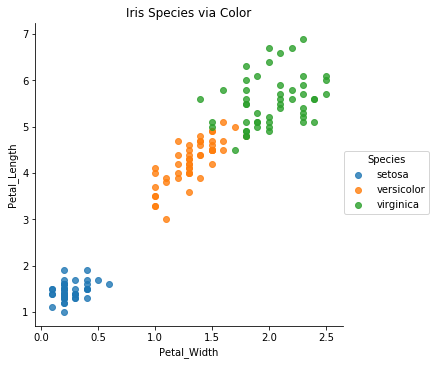

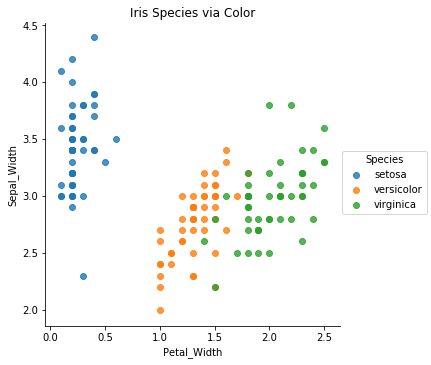

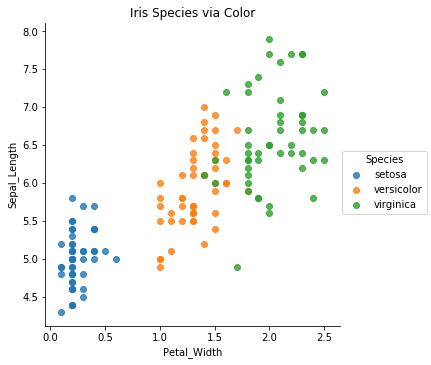

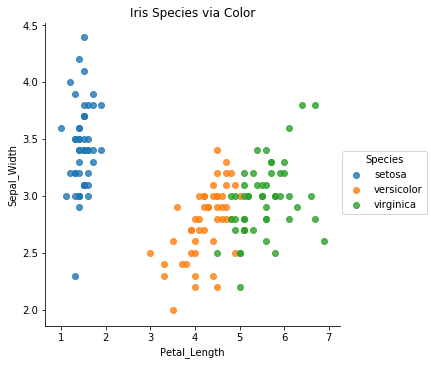

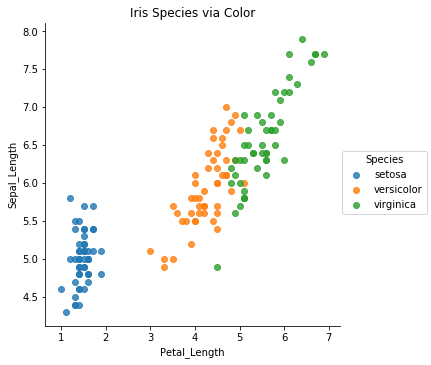

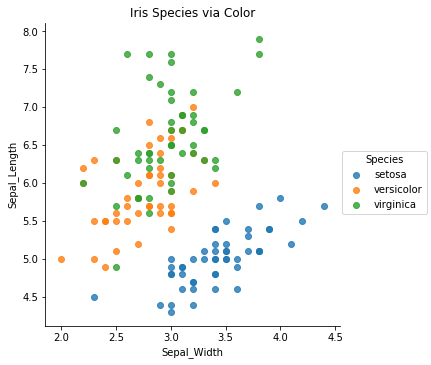

In [6]:
#Create 2-variable pair-wise scatter plots of 4 features w/ matplotlib.pyplot & seaborn
#This will help to look for trends of features
%matplotlib inline
def plot_iris(iris,col1,col2):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.lmplot(x = col1, y = col2,
               data = iris,
               hue = "Species",
               fit_reg = False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris Species via Color')
    plt.show()
plot_iris(iris.data, 'Petal_Width', 'Petal_Length')
plot_iris(iris.data, 'Petal_Width', 'Sepal_Width')
plot_iris(iris.data, 'Petal_Width', 'Sepal_Length')
plot_iris(iris.data, 'Petal_Length', 'Sepal_Width')
plot_iris(iris.data, 'Petal_Length', 'Sepal_Length')
plot_iris(iris.data, 'Sepal_Width', 'Sepal_Length')

In [8]:
#Above- Setosa is more separated in all plots, where Versicolor & Virginica overlap a bit
#Below- Prepare Data Set:
#Step 1- Even out numeric values by scaling them the same to prevent weighting using Zscore Normalization
#This scales each feature's mean=0 & variance=1.0 w/ scikit-learn.preprocessing & pandas
#Assign column names to resulting data frame
#Print statistical summary
from sklearn.preprocessing import scale
import pandas as pd
num_cols = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
iris_scaled = scale(iris.data[num_cols])
iris_scaled = pd.DataFrame(iris_scaled, columns = num_cols)
print(iris_scaled.describe().round(3))

       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count       150.000      150.000       150.000      150.000
mean         -0.000       -0.000        -0.000       -0.000
std           1.003        1.003         1.003        1.003
min          -1.870       -2.434        -1.568       -1.447
25%          -0.901       -0.592        -1.227       -1.184
50%          -0.053       -0.132         0.336        0.133
75%           0.675        0.559         0.763        0.791
max           2.492        3.091         1.786        1.712


In [10]:
#Scikit-learn pkg require numeric numpy arrays as arguments
#Thus need to re-code Species strings as numbers, which can be done using a dictonary lookup
levels = {'setosa':0, 'versicolor':1, 'virginica':2}
iris_scaled['Species'] = [levels[x] for x in iris.data['Species']]
iris_scaled.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [12]:
#Below- Prepare Data Set:
#Step 2- Randomly split data into training and test sub-sets by Bernoulli sampling w/ scikit-learn and numpy
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(3456)
iris_split = train_test_split(np.asmatrix(iris_scaled), test_size = 75)
iris_train_features = iris_split[0][:, :4]
iris_train_labels = np.ravel(iris_split[0][:, 4])
iris_test_features = iris_split[1][:, :4]
iris_test_labels = np.ravel(iris_split[1][:, 4])
print(iris_train_features.shape)
print(iris_train_labels.shape)
print(iris_test_features.shape)
print(iris_test_labels.shape)

(75, 4)
(75,)
(75, 4)
(75,)


In [13]:
#Train & Evaluate KNN Model:
#Train Model KNN- K=3, fit method, & numpy arrays as arguments w/ scikit-learn
#Print model summary
from sklearn.neighbors import KNeighborsClassifier
KNN_mod = KNeighborsClassifier(n_neighbors = 3)
KNN_mod.fit(iris_train_features, iris_train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [14]:
#Evaluate model:
#Test features used to compute KNN predictions
#Predictions scored
#Accuracy computed as perentage of true positives
iris_test = pd.DataFrame(iris_test_features, columns = num_cols)
iris_test['Predicted'] = KNN_mod.predict(iris_test_features)
iris_test['Correct'] = [1 if x == z else 0 for x, z in zip(iris_test['Predicted'], iris_test_labels)]
accuracy = 100.0 * float(sum(iris_test['Correct']))/float(iris_test.shape[0])
print(accuracy)

96.0


'Done'

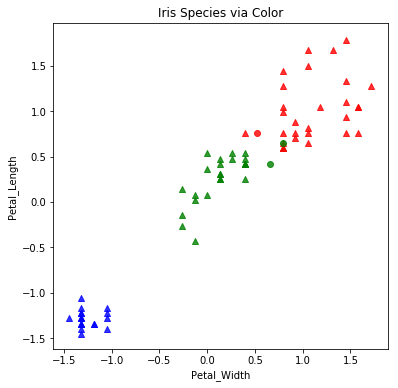

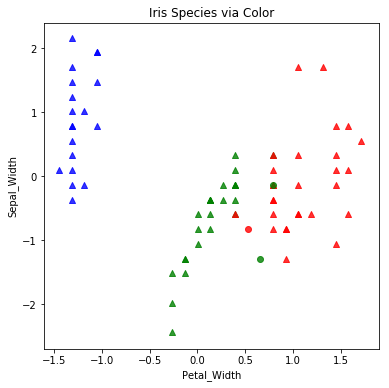

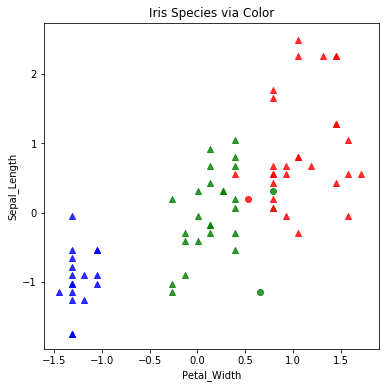

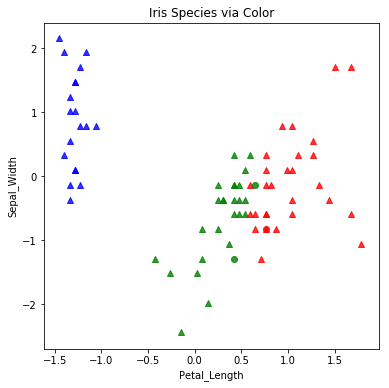

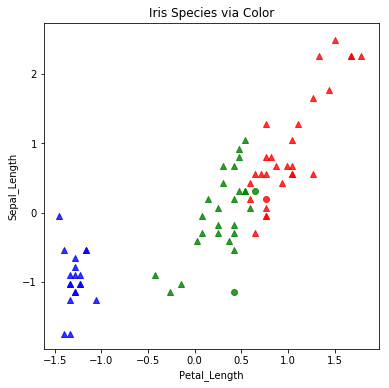

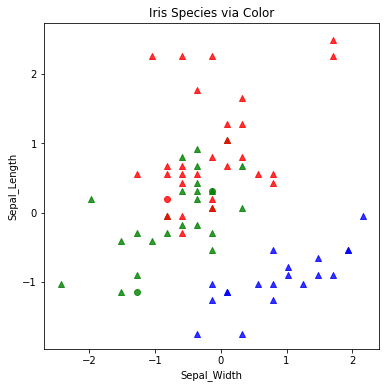

In [16]:
#Examine plots of classifications of iris species
levels = {0:'setosa', 1:'versicolor', 2:'virginica'}
iris_test['Species'] = [levels[x] for x in iris_test['Predicted']]
markers = {1:'^', 0: 'o'}
colors = {'setosa':'blue', 'versicolor':'green', 'virginica':'red'}
def plot_shapes(df, col1, col2, markers, colors):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ax = plt.figure(figsize=(6, 6)).gca() # define plot axis
    for m in markers:                     # iterate over marker dictionary keys
        for c in colors:                  # iterate over color dictionary keys
            df_temp = df[(df['Correct'] == m) & (df["Species"] == c)]
            sns.regplot(x = col1, y = col2,
                        data = df_temp,
                        fit_reg = False,
                        scatter_kws = {'Color': colors[c]},
                        marker = markers[m],
                        ax = ax)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris Species via Color')
    return 'Done'
plot_shapes(iris_test, 'Petal_Width', 'Petal_Length', markers, colors)
plot_shapes(iris_test, 'Petal_Width', 'Sepal_Width', markers, colors)
plot_shapes(iris_test, 'Petal_Width', 'Sepal_Length', markers, colors)
plot_shapes(iris_test, 'Petal_Length', 'Sepal_Width', markers, colors)
plot_shapes(iris_test, 'Petal_Length', 'Sepal_Length', markers, colors)
plot_shapes(iris_test, 'Sepal_Width', 'Sepal_Length', markers, colors)